<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#...-and-the-Cross-Section-of-Expected-Returns" data-toc-modified-id="...-and-the-Cross-Section-of-Expected-Returns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>... and the Cross-Section of Expected Returns</a></span></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Download-Data" data-toc-modified-id="Download-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Download Data</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Share-type---select-only-common-stocks" data-toc-modified-id="Share-type---select-only-common-stocks-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Share type - select only common stocks</a></span></li><li><span><a href="#Select-stocks-traded-on-the-major-stock-exchanges" data-toc-modified-id="Select-stocks-traded-on-the-major-stock-exchanges-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Select stocks traded on the major stock exchanges</a></span></li><li><span><a href="#Delete-missing-returns" data-toc-modified-id="Delete-missing-returns-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Delete missing returns</a></span></li><li><span><a href="#Merge-data" data-toc-modified-id="Merge-data-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Merge data</a></span></li></ul></li><li><span><a href="#Data-Summary" data-toc-modified-id="Data-Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Summary</a></span></li><li><span><a href="#Forcasting-Future-Excess-Returns" data-toc-modified-id="Forcasting-Future-Excess-Returns-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Forcasting Future Excess Returns</a></span><ul class="toc-item"><li><span><a href="#Does-BEME-forcast-future-returns?" data-toc-modified-id="Does-BEME-forcast-future-returns?-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Does BEME forcast future returns?</a></span><ul class="toc-item"><li><span><a href="#What-is-the-problem?" data-toc-modified-id="What-is-the-problem?-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>What is the problem?</a></span></li><li><span><a href="#Try-to-run-the-FM-regression-again!" data-toc-modified-id="Try-to-run-the-FM-regression-again!-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Try to run the FM regression again!</a></span></li></ul></li><li><span><a href="#Does-size-forcast-future-returns?" data-toc-modified-id="Does-size-forcast-future-returns?-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Does size forcast future returns?</a></span></li><li><span><a href="#What-about-Fama-and-French-2015?" data-toc-modified-id="What-about-Fama-and-French-2015?-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>What about Fama and French 2015?</a></span></li></ul></li><li><span><a href="#Long-short-portfolio" data-toc-modified-id="Long-short-portfolio-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Long-short portfolio</a></span><ul class="toc-item"><li><span><a href="#Sort-Portfolio" data-toc-modified-id="Sort-Portfolio-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Sort Portfolio</a></span></li><li><span><a href="#Portfolio-returns" data-toc-modified-id="Portfolio-returns-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Portfolio returns</a></span><ul class="toc-item"><li><span><a href="#Merge-data" data-toc-modified-id="Merge-data-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Merge data</a></span></li><li><span><a href="#Calculate-returns" data-toc-modified-id="Calculate-returns-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Calculate returns</a></span></li></ul></li><li><span><a href="#Average-Returns" data-toc-modified-id="Average-Returns-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Average Returns</a></span></li><li><span><a href="#Compare-Sharpe-ratio" data-toc-modified-id="Compare-Sharpe-ratio-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Compare Sharpe-ratio</a></span></li></ul></li></ul></div>

# Big Data in Finance: Part IV <BR><BR> Lecture Notes 5: Factor Investing 
    
**Instructor** <BR>
Kirsten Burr, kburr26@gsb.columbia.edu
    
**TA's:** <BR>
Meha Sadasivam, MSadasivam21@gsb.columbia.edu <BR>
Daheng Yang, dyang22@gsb.columbia.edu
    
<sub> Credit: lecture notes originally developed by Lira Mota

## Objective

Construct FF5 characteristic-sorted portfolios

## ... and the Cross-Section of Expected Returns

1. [Harvey, Liu and Zhu (RFS, 2016)](https://academic.oup.com/rfs/article/29/1/5/1843824)
    1. "Hundreds of papers and factors attempt to explain the cross-section of expected returns."
    2. They [list 313 papers](http://faculty.fuqua.duke.edu/~charvey/Factor-List.xlsx) published in a selection of journals that study cross-sectional return patterns. 

2. The majority of those papers goes: 
    1. We show that stocks with high value of x on average outperform stocks with low value of x.
    2. Is it robust? Run a Fama-MacBeth regression;
    3. Is it explained by risk? Form a long-short portfolio based on the new characteristic sort. Test if this portfolio earns an "alpha" with respect the benchmark model.

## Set Up

In [1]:
#%% Packages 
import sys
import pandas as pd
import numpy as np
import datetime

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt

import time
from time import strptime, strftime

# Setups
pd.set_option("display.max_rows", 100) # max number or rows to be displayed 
%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 6]
idx = pd.IndexSlice

**(FI)nance (RE)search Python Tools: fire_pytools**

* To make our lives easier, we will use a fire_pytools package.

* Written by our alumni, Lira Mota
    - Download the package [here](https://bitbucket.org/liramota/fire_pytools/src)

* This is a collection of useful functions in finance research.
    - Direct download of CRSP and Compustat from WRDS server
    - Direct download of Ken French data library
    - Portfolio sorts tools
    - Replicate Fama and French factors

In [2]:
# Packages from fire_pytools
sys.path.append("../fire_pytools") 

# Data Import
from data_setup import stock_monthly
from data_setup import stock_annual

# Functions 
from utils.monthly_date import *
from portools.find_breakpoints import find_breakpoints
from portools.sort_portfolios import sort_portfolios
from import_kf.kf_factors import *

## Download Data

In [3]:
# mdata = stock_monthly.main()
# mdata.to_pickle(path = './stock_monthly.pkl')
mdata = pd.read_pickle('./stock_monthly.pkl')
mdata.columns

Index(['permno', 'date', 'dlret', 'dlretx', 'exchcd', 'naics', 'permco', 'prc',
       'ret', 'shrcd', 'shrout', 'siccd', 'ticker', 'rankyear', 'retadj', 'me',
       'lag_me', 'lag_dlret', 'melag_weights', 'mdate', 'rf'],
      dtype='object')

In [4]:
# adata = stock_annual.main()
# adata.to_pickle('./stock_annual.pkl')
adata = pd.read_pickle('./stock_annual.pkl')
adata.columns

Index(['gvkey', 'datadate', 'cusip', 'tic', 'cik', 'conm', 'fyear', 'fyr',
       'aqc', 'at', 'capx', 'ceq', 'ch', 'che', 'cogs', 'csho', 'dlc', 'dlcch',
       'dltis', 'dltt', 'dltr', 'dp', 'dv', 'dvc', 'dvp', 'ebit', 'ebitda',
       'ib', 'icapt', 'itcb', 'ivao', 'lt', 'mib', 'naicsh', 'ni', 'oibdp',
       'ppegt', 'prstkc', 'prstkcc', 'pstk', 'pstkl', 'pstkrv', 're', 'rstche',
       'rstchelt', 'sale', 'seq', 'sppe', 'sich', 'sstk', 'txdb', 'txdi',
       'txditc', 'wcapch', 'xint', 'xrd', 'xsga', 'prba', 'be', 'op', 'opbe',
       'inv_gvkey', 'rankyear', 'ner', 'nert', 'ndi', 'fdat', 'fdat_net',
       'ltat', 'fdbe', 'fdbe_net', 'permno', 'permco', 'linkdt', 'linkenddt',
       'inv_permco', 'mejune', 'exchcd', 'shrcd', 'ticker', 'siccd',
       'mesum_june', 'medec', 'mesum_dec', 'beme', 'sich_filled'],
      dtype='object')

In [5]:
# Create excess returns
mdata['exret'] = mdata['retadj'] - mdata['rf']

## Clean Data

### Share type - select only common stocks 

**First Digit - Security Type** <BR>
1	Ordinary Common Shares <BR>
2	Certificates <BR>
3	ADRs (American Depository Receipts) <BR>
4	SBIs (Shares of Beneficial Interest) <BR>
7	Units (Depository Units, Units of Benefic ial Interest, Units of Limited Partnership Interest, Depository Receipts, etc.) <BR> <BR>

**Second Digit - Share Code - Security Type** <BR>
0	Securities which have not been further defined. <BR>
1	Securities which need not be further defined. <BR>
2	Companies incorporated outside the US <BR>
3	Americus Trust Components (Primes and Scores). <BR>
4	Closed-end funds. <BR>
5	Closed-end fund companies incorporated outside the US <BR>
8	REIT's (Real Estate Investment Trusts). <BR>

In [6]:
mdata.shrcd.isin([10, 11]).mean() * 100 

76.96451256146982

In [7]:
mdata = mdata[mdata.shrcd.isin([10, 11])]

### Select stocks traded on the major stock exchanges

-2	Halted by the NYSE or AMEX <BR>
-1	Suspended by the NYSE, AMEX, or NASDAQ <BR>
0	Not Trading on NYSE, AMEX, or NASDAQ <BR>
1	New York Stock Exchange <BR>
2	American Stock Exchange <BR>
3	The Nasdaq Stock Market(SM) <BR>
4	The Arca Stock Market(SM) <BR>
5	Mutual Funds (As Quoted by NASDAQ) <BR>
10	Boston Stock Exchange <BR>
13	Chicago Stock Exchange <BR>
16	Pacific Stock Exchange <BR>
17	Philadelphia Stock Exchange <BR>
19	Toronto Stock Exchange <BR>
20	Over-The-Counter (Non-NASDAQ Dealer Quotations) <BR>
31	When-issued trading on the NYSE <BR>
32	When-issued trading on the AMEX <BR>
33	When-issued trading on The NASDAQ <BR>

In [8]:
mdata.exchcd.isin([1, 2, 3]).mean()

0.9838048021518704

In [9]:
mdata = mdata[mdata.exchcd.isin([1, 2, 3])]

### Delete missing returns

In [10]:
mdata = mdata[mdata['exret'].notnull()]
mdata = mdata[mdata['lag_me'].notnull()]

### Merge data

In [11]:
# Example: APPLE
adata['beme'] *= 1000
adata[['permno', 'gvkey', 'tic', 'fyear', 'datadate', 'rankyear', 'beme']][adata.permno==14593]

,permno,gvkey,tic,fyear,datadate,rankyear,beme
54210,14593,NaN,NaN,NaN,NaT,1981.0,NaN
54211,14593,001690,AAPL,1981.0,1981-09-30,1982.0,0.148537
54212,14593,001690,AAPL,1982.0,1982-09-30,1983.0,0.156761
54213,14593,001690,AAPL,1983.0,1983-09-30,1984.0,0.294510
54214,14593,001690,AAPL,1984.0,1984-09-30,1985.0,0.301711
54215,14593,001690,AAPL,1985.0,1985-09-30,1986.0,0.467580
54216,14593,001690,AAPL,1986.0,1986-09-30,1987.0,0.327216
54217,14593,001690,AAPL,1987.0,1987-09-30,1988.0,0.191594
54218,14593,001690,AAPL,1988.0,1988-09-30,1989.0,0.253107
54219,14593,001690,AAPL,1989.0,1989-09-30,1990.0,0.418876


In [12]:
mdata[mdata.permno==14593][['permno', 'date', 'exret']]

,permno,date,exret
629244,14593,1981-01-30,-0.179975
629245,14593,1981-02-27,-0.072359
629246,14593,1981-03-31,-0.088274
629247,14593,1981-04-30,0.146604
629248,14593,1981-05-29,0.153828
...,...,...,...
629743,14593,2022-08-31,-0.033038
629744,14593,2022-09-30,-0.122906
629745,14593,2022-10-31,0.107224
629746,14593,2022-11-30,-0.035985


Our objective: find stock characteristics that forecast **FUTURE** returns. <BR><BR>
$$r_{i,t+1} = \alpha + \beta c_{i,t} + \varepsilon_{i,t+1} $$


In [13]:
# Portfolios are rebalanced in the end of june
mdata['rankyear'] = mdata.date.dt.year
mdata.loc[mdata.date.dt.month <= 6, 'rankyear'] = mdata.loc[mdata.date.dt.month <= 6, 'rankyear'] - 1

In [14]:
mdata[['permno', 'date', 'rankyear', 'exchcd', 'exret', 'lag_me']][mdata.permno==14593]

,permno,date,rankyear,exchcd,exret,lag_me
629244,14593,1981-01-30,1980,3.0,-0.179975,1.884962e+03
629245,14593,1981-02-27,1980,3.0,-0.072359,1.564484e+03
629246,14593,1981-03-31,1980,3.0,-0.088274,1.467996e+03
629247,14593,1981-04-30,1980,3.0,0.146604,1.357724e+03
629248,14593,1981-05-29,1980,3.0,0.153828,1.571376e+03
...,...,...,...,...,...,...
629743,14593,2022-08-31,2022,3.0,-0.033038,2.611658e+06
629744,14593,2022-09-30,2022,3.0,-0.122906,2.526644e+06
629745,14593,2022-10-31,2022,3.0,0.107224,2.203381e+06
629746,14593,2022-11-30,2022,3.0,-0.035985,2.439351e+06


In [15]:
fdata = pd.merge(mdata[['permno', 'date', 'ticker', 'rankyear', 'exchcd', 'exret', 'retadj', 'lag_me', 'rf']],
                 adata[['permno', 'gvkey', 'conm', 'fyear', 'datadate', 'rankyear', 'mesum_dec', 'beme', 'opbe', 'inv_gvkey']],
                 on = ['permno','rankyear' ])

In [16]:
fdata.rename(columns = {'inv_gvkey': 'inv'}, inplace = True)
fdata.rename(columns = {'mesum_dec': 'mesum'}, inplace = True)

## Data Summary

In [17]:
fdata.describe()

,permno,rankyear,exchcd,exret,retadj,lag_me,rf,fyear,mesum,beme,opbe,inv
count,3.562917e+06,3.562917e+06,3.562917e+06,3.562917e+06,3.562917e+06,3.562917e+06,3.562917e+06,3.199809e+06,3.177910e+06,3.048183e+06,2.758718e+06,2.800712e+06
mean,4.969405e+04,1.988590e+03,2.113757e+00,7.911785e-03,1.144213e-02,1.865446e+03,3.530343e-03,1.988374e+03,1.989897e+06,1.025750e+00,8.195369e-03,2.792931e+00
std,2.830880e+04,2.058745e+01,9.309373e-01,1.805498e-01,1.804818e-01,1.699896e+04,2.688758e-03,2.070458e+01,1.755587e+07,4.162261e+00,4.831336e+01,5.151292e+02
min,1.000000e+04,1.926000e+03,1.000000e+00,-1.014149e+00,-1.000000e+00,0.000000e+00,-2.650000e-04,1.925000e+03,2.475000e+01,1.227392e-05,-2.261400e+04,-9.998177e-01
25%,2.113500e+04,1.977000e+03,1.000000e+00,-6.761671e-02,-6.398104e-02,1.728675e+01,1.208000e-03,1.977000e+03,1.952875e+04,3.718898e-01,7.893242e-02,-8.202707e-03
50%,4.827400e+04,1.991000e+03,2.000000e+00,-3.201000e-03,0.000000e+00,7.501000e+01,3.672000e-03,1.992000e+03,8.643600e+04,6.736575e-01,2.110166e-01,8.073031e-02
75%,7.821600e+04,2.003000e+03,3.000000e+00,6.665600e-02,6.995885e-02,4.168807e+02,4.943000e-03,2.003000e+03,4.770682e+05,1.140293e+00,3.213584e-01,2.209056e-01
max,9.343600e+04,2.022000e+03,3.000000e+00,2.399694e+01,2.400000e+01,2.902368e+06,1.515800e-02,2.021000e+03,2.902368e+09,1.250093e+03,3.141250e+03,4.091835e+05


## Forcasting Future Excess Returns

In [18]:
# FamaMacBeth regression
def ols_coef(x,formula):
    return smf.ols(formula,data=x).fit().params

def fm_summary(p):
    s = p.describe().T
    s['std_error'] = s['std']/np.sqrt(s['count'])
    s['tstat'] = s['mean']/s['std_error']
    return s[['mean','std_error','tstat']]

### Does BEME forcast future returns?

In [19]:
gamma_beme = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + beme'))
gamma_beme.head()

,Intercept,beme
date,,
1926-07-31,0.012579,0.005882
1926-08-31,0.009899,0.002373
1926-09-30,-0.013706,0.006393
1926-10-30,-0.037200,-0.000149
1926-11-30,0.017929,0.008330


<AxesSubplot:xlabel='date'>

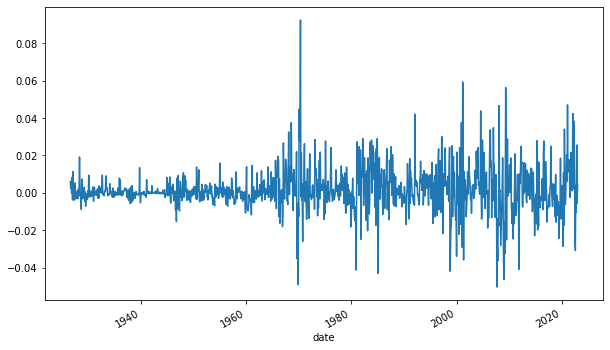

In [20]:
gamma_beme.beme.plot()

#### What is the problem? 

In [19]:
fdata.dropna(subset=['mesum', 'beme', 'opbe', 'inv'], inplace = True)

<AxesSubplot:xlabel='date'>

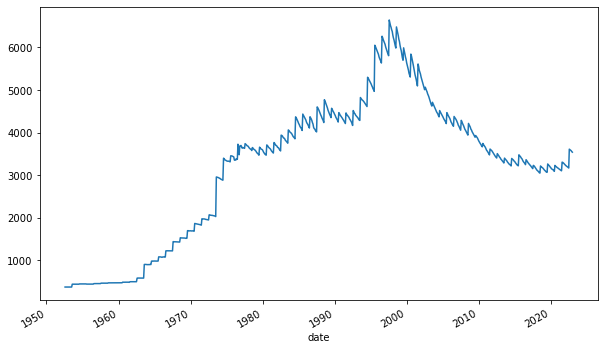

In [21]:
fdata.groupby('date').count().rankyear.plot()

In [22]:
fdata = fdata[fdata.rankyear>=1963]

#### Try to run the FM regression again!

In [23]:
gamma_beme = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + beme'))
gamma_beme.head()

,Intercept,beme
date,,
1963-07-31,-0.006559,-0.004590
1963-08-30,0.050975,-0.005010
1963-09-30,-0.029356,0.009147
1963-10-31,0.009544,0.005235
1963-11-29,-0.011189,-0.000489


<AxesSubplot:xlabel='date'>

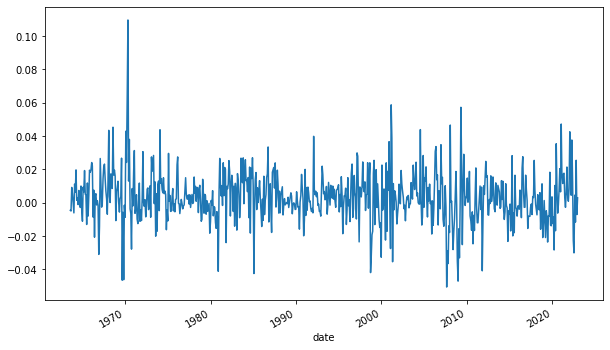

In [24]:
gamma_beme.beme.plot()

In [25]:
# Fama-Macbeth regressions results
fm_summary(gamma_beme)

,mean,std_error,tstat
Intercept,0.005364,0.002264,2.369582
beme,0.003220,0.000568,5.668748


**What's the problem (again)?**

<AxesSubplot:>

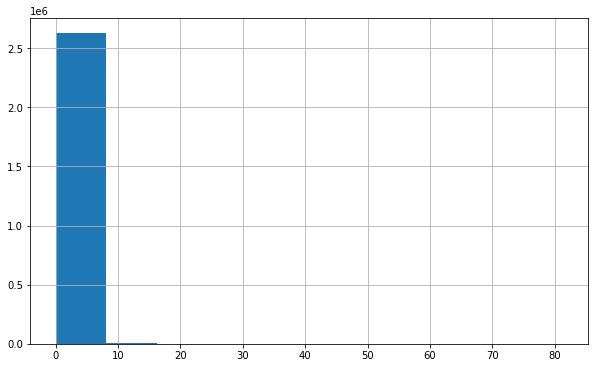

In [27]:
fdata.beme.hist()

<AxesSubplot:xlabel='date'>

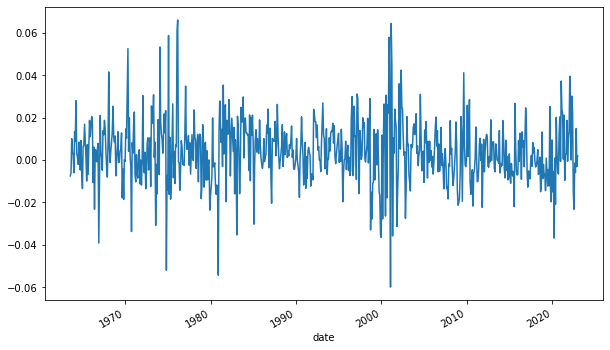

In [26]:
# Try log 
gamma_beme = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + np.log(beme)'))
gamma_beme['np.log(beme)'].plot()

In [27]:
# Fama-Macbeth regressions results
fm_summary(gamma_beme)

,mean,std_error,tstat
Intercept,0.009790,0.002113,4.632453
np.log(beme),0.003767,0.000549,6.866888


#### Is Value dead?

In [28]:
fm_summary(gamma_beme.loc['2010-01-01':])

,mean,std_error,tstat
Intercept,0.010254,0.004656,2.202629
np.log(beme),0.001140,0.000981,1.162178


In [29]:
fm_summary(gamma_beme.loc[:'2006-12-31'])

,mean,std_error,tstat
Intercept,0.010684,0.002359,4.529734
np.log(beme),0.004903,0.000667,7.349767


### Does size forcast future returns?

<AxesSubplot:xlabel='date'>

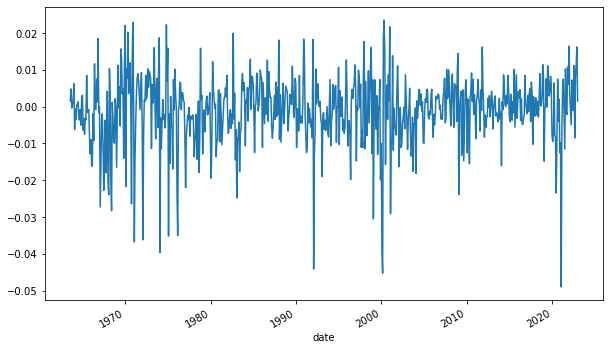

In [30]:
gamma_me = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + np.log(mesum)'))
gamma_me['np.log(mesum)'].plot()

In [31]:
# Fama-Macbeth regressions results
fm_summary(gamma_me) 

,mean,std_error,tstat
Intercept,0.019529,0.005255,3.716007
np.log(mesum),-0.001056,0.000347,-3.042086


#### What happened to Size factor?

In [32]:
fm_summary(gamma_me['2010-01-01':]) 

,mean,std_error,tstat
Intercept,0.005439,0.010398,0.523034
np.log(mesum),0.000271,0.000601,0.450320


In [33]:
fm_summary(gamma_me[:'2006-12-31'])

,mean,std_error,tstat
Intercept,0.025870,0.006292,4.111606
np.log(mesum),-0.001569,0.000428,-3.663258


### What about Fama and French 2015?

In [34]:
gamma_f5 = (fdata.groupby('date')
                .apply(ols_coef,'exret ~ 1 + np.log(mesum)+ np.log(beme) + opbe + inv'))
gamma_f5.head()

,Intercept,np.log(mesum),np.log(beme),opbe,inv
date,,,,,
1963-07-31,-0.014215,0.000114,-0.007562,0.000666,-0.003754
1963-08-30,-0.006858,0.004742,-0.000159,0.002730,-0.004594
1963-09-30,-0.036090,0.001683,0.011904,0.003427,-0.010557
1963-10-31,-0.008050,0.001757,0.007862,0.018836,0.001823
1963-11-29,-0.036509,0.002485,0.004464,0.002897,-0.027017


<AxesSubplot:xlabel='date'>

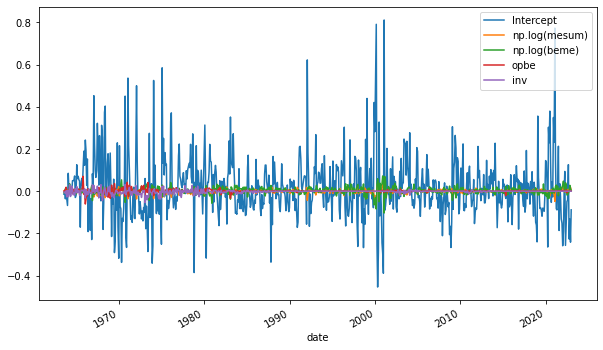

In [37]:
gamma_f5.plot()

In [38]:
fm_summary(gamma_f5)

,mean,std_error,tstat
Intercept,0.017341,0.005457,3.177833
np.log(mesum),-0.000728,0.000375,-1.942154
np.log(beme),0.002837,0.000607,4.673214
opbe,0.000494,0.000281,1.757635
inv,-0.001840,0.000322,-5.716845


In [35]:
fm_summary(gamma_f5[:'2006-12-31']) 

,mean,std_error,tstat
Intercept,0.023823,0.006591,3.614767
np.log(mesum),-0.001217,0.000465,-2.617053
np.log(beme),0.003428,0.000745,4.604515
opbe,0.000623,0.000380,1.636797
inv,-0.002412,0.000435,-5.541248


## Long-short portfolio

### How to Construct a ``Factor"?
<img src="ff6.png" width="800" height="400">

### Sort Portfolio

In [36]:
port = sort_portfolios(data = fdata,
                       quantiles={'mesum': [0.5],
                                  'beme': [0.3, 0.7],
                                  'opbe': [0.3, 0.7],
                                  'inv': [0.3, 0.7]},
                       id_variables=['rankyear', 'permno', 'exchcd'],
                       exch_cd=[1])  

NYSE breakpoints were calculated for mesum.
Stocks were sorted according to breakpoints, starting in 1963
NYSE breakpoints were calculated for beme.
Stocks were sorted according to breakpoints, starting in 1963
NYSE breakpoints were calculated for opbe.
Stocks were sorted according to breakpoints, starting in 1963
NYSE breakpoints were calculated for inv.
Stocks were sorted according to breakpoints, starting in 1963


Look at the data.

In [37]:
port.head()

,rankyear,permno,invportfolio,opbeportfolio,bemeportfolio,mesumportfolio
0,1963,10006.0,inv1,opbe1,beme3,mesum2
1,1963,10014.0,inv2,opbe1,beme3,mesum1
2,1963,10102.0,inv3,opbe2,beme2,mesum2
3,1963,10137.0,inv2,opbe3,beme1,mesum2
4,1963,10145.0,inv3,opbe2,beme2,mesum2


In [38]:
port.groupby(['rankyear','mesumportfolio']).mesumportfolio.count()

rankyear  mesumportfolio
1963      mesum1             524
          mesum2             382
1964      mesum1             595
          mesum2             391
1965      mesum1             669
                            ... 
2020      mesum2             879
2021      mesum1            2386
          mesum2             928
2022      mesum1            2655
          mesum2             960
Name: mesumportfolio, Length: 120, dtype: int64

### Portfolio returns

#### Merge data

In [39]:
port_ret = pd.merge(fdata[['permno', 'date', 'rankyear', 'exret', 'retadj', 'lag_me', 'ticker', 'conm', 'rf']], 
                port,
                on = ['permno', 'rankyear']) 

Have a look at Apple in 2019. Which portfolio did Apple belong to?

In [40]:
port_ret[(port_ret.ticker=='AAPL') & (port_ret.date=='2019-01-31')]

,permno,date,rankyear,exret,retadj,lag_me,ticker,conm,rf,invportfolio,opbeportfolio,bemeportfolio,mesumportfolio
283059,14593,2019-01-31,2018,0.053234,0.055154,746079.151202,AAPL,APPLE INC,0.00192,inv3,opbe3,beme1,mesum2


In [42]:
port_ret[(port_ret.ticker=='AAPL') & (port_ret.date=='2020-01-31')]

,permno,date,rankyear,exret,retadj,lag_me,ticker,conm,rf,invportfolio,opbeportfolio,bemeportfolio,mesumportfolio
283071,14593,2020-01-31,2019,0.052846,0.05401,1.287643e+06,AAPL,APPLE INC,0.001164,inv1,opbe3,beme1,mesum2


#### Calculate returns

In [43]:
beme_ret = port_ret.groupby(['date', 'mesumportfolio', 'bemeportfolio']).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))

In [44]:
beme_ret

date        mesumportfolio  bemeportfolio
1963-07-31  mesum1          beme1           -0.008538
                            beme2           -0.009547
                            beme3           -0.016721
            mesum2          beme1            0.001260
                            beme2            0.004718
                                               ...   
2022-12-30  mesum1          beme2           -0.065943
                            beme3           -0.052649
            mesum2          beme1           -0.071824
                            beme2           -0.041714
                            beme3           -0.052176
Length: 4284, dtype: float64

In [45]:
beme_ret = beme_ret.unstack(level=[1, 2])
beme_ret

mesumportfolio    mesum1                        mesum2                    
bemeportfolio      beme1     beme2     beme3     beme1     beme2     beme3
date                                                                      
1963-07-31     -0.008538 -0.009547 -0.016721  0.001260  0.004718 -0.012421
1963-08-30      0.058752  0.049112  0.054417  0.054961  0.046401  0.076299
1963-09-30     -0.037228 -0.012831 -0.017964 -0.015183 -0.006918 -0.004640
1963-10-31      0.009548  0.015880  0.034698  0.045328  0.016143  0.028258
1963-11-29     -0.023892 -0.014601 -0.002550 -0.011891  0.004552 -0.011355
...                  ...       ...       ...       ...       ...       ...
2022-08-31      0.013394 -0.017093 -0.019949 -0.046434 -0.024458 -0.016840
2022-09-30     -0.088188 -0.097253 -0.092963 -0.092160 -0.090886 -0.086312
2022-10-31      0.074884  0.106470  0.135648  0.052339  0.106247  0.153846
2022-11-30     -0.003806  0.016751  0.016750  0.049810  0.053791  0.048907
2022-12-30     -0.054545 -0.065943 -0.052649 -0.071824 -0.041714 -0.052176

[714 rows x 6 columns]

<AxesSubplot:xlabel='date'>

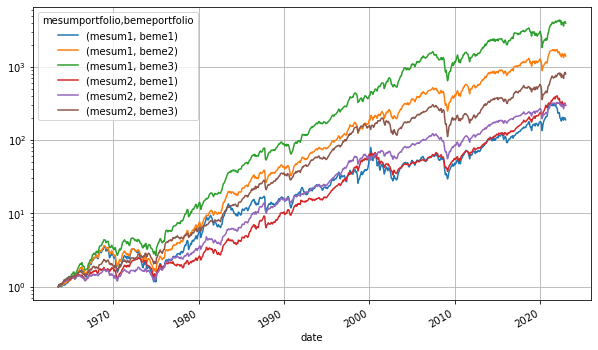

In [49]:
(1+beme_ret).cumprod().plot(grid=True, logy=True)

In [46]:
# HML returns
beme_ret['hml'] = beme_ret.loc[:, idx[:, 'beme3']].mean(axis=1) - beme_ret.loc[:, idx[:, 'beme1']].mean(axis=1)

In [47]:
rf_data = mdata.loc[(mdata.date >= '1963-07-01') , ['date','rf']].drop_duplicates()
rf_data.set_index('date', inplace = True)

<AxesSubplot:xlabel='date'>

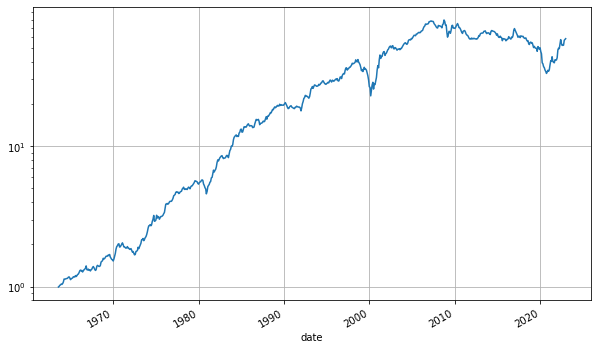

In [48]:
(1+beme_ret['hml'].add(rf_data['rf'], axis = 'index')).cumprod().plot(grid=True, logy = True)

In [49]:
# Characteristic: beme
# --------------------
charvars = ['mesum', 'beme']
beme_ret = port_ret.groupby(['date']+[charvar+"portfolio" for charvar in charvars]).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))
beme_ret = beme_ret.unstack(level=[1, 2])
beme_ret['hml'] = beme_ret.loc[:, idx[:, 'beme3']].mean(axis=1) - beme_ret.loc[:, idx[:, 'beme1']].mean(axis=1)

In [51]:
# Characteristic: op
# -------------------
charvars = ['mesum', 'opbe']
op_ret = port_ret.groupby(['date']+[charvar+"portfolio" for charvar in charvars]).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))
op_ret = op_ret.unstack(level=[1, 2])
op_ret['rmw'] = op_ret.loc[:, idx[:, 'opbe3']].mean(axis=1) - op_ret.loc[:, idx[:, 'opbe1']].mean(axis=1)
del charvars

In [52]:
# Characteristic: inv
# -------------------
charvars = ['mesum', 'inv']
inv_ret = port_ret.groupby(['date']+[charvar+"portfolio" for charvar in charvars]).apply(
    lambda x: np.average(x.retadj, weights=x.lag_me))
inv_ret = inv_ret.unstack(level=[1, 2])
inv_ret['cma'] = inv_ret.loc[:, idx[:, 'inv1']].mean(axis=1) - inv_ret.loc[:, idx[:, 'inv3']].mean(axis=1)
del charvars

In [53]:
inv_ret

mesumportfolio    mesum1                        mesum2                      \
invportfolio        inv1      inv2      inv3      inv1      inv2      inv3   
date                                                                         
1963-07-31     -0.018541 -0.013862 -0.003078 -0.012528  0.004541  0.004152   
1963-08-30      0.048955  0.046819  0.063307  0.061669  0.049925  0.053848   
1963-09-30     -0.011989 -0.020595 -0.027963 -0.016715 -0.009981 -0.010115   
1963-10-31      0.017921  0.017541  0.028830  0.023777  0.015821  0.063848   
1963-11-29     -0.007312 -0.012075 -0.017028  0.003895  0.001684 -0.020873   
...                  ...       ...       ...       ...       ...       ...   
2022-08-31     -0.013465 -0.016748 -0.002606 -0.018945 -0.038952 -0.053261   
2022-09-30     -0.104851 -0.083646 -0.095871 -0.083992 -0.092469 -0.094549   
2022-10-31      0.124267  0.127092  0.076254  0.121901  0.079178  0.027864   
2022-11-30      0.024176  0.027564 -0.014058  0.060244  0.057867  0.021925   
2022-12-30     -0.046074 -0.056644 -0.071462 -0.036404 -0.056186 -0.107020   

mesumportfolio       cma  
invportfolio              
date                      
1963-07-31     -0.016071  
1963-08-30     -0.003265  
1963-09-30      0.004687  
1963-10-31     -0.025490  
1963-11-29      0.017243  
...                  ...  
2022-08-31      0.011728  
2022-09-30      0.000788  
2022-10-31      0.071025  
2022-11-30      0.038277  
2022-12-30      0.048002  

[714 rows x 7 columns]

In [54]:
# Characteristic: size
# --------------------
fret = pd.DataFrame()
fret['smb'] = (beme_ret.loc[:, 'mesum1'].mean(axis=1) - beme_ret.loc[:,'mesum2'].mean(axis=1) +
               op_ret.loc[:, 'mesum1'].mean(axis=1) - op_ret.loc[:,'mesum2'].mean(axis=1) +
               inv_ret.loc[:, 'mesum1'].mean(axis=1) - inv_ret.loc[:,'mesum2'].mean(axis=1))*(1/3)

In [55]:
# %% Aggregate all
beme_ret.columns = [''.join(col).strip() for col in beme_ret.columns.values]
op_ret.columns = [''.join(col).strip() for col in op_ret.columns.values]
inv_ret.columns = [''.join(col).strip() for col in inv_ret.columns.values]

In [56]:
fret = fret.join(beme_ret[['hml']]).join(op_ret[['rmw']]).join(inv_ret[['cma']])

In [57]:
fret  

,smb,hml,rmw,cma
date,,,,
1963-07-31,-0.010490,-0.010932,0.007197,-0.016071
1963-08-30,-0.002377,0.008502,0.003703,-0.003265
1963-09-30,-0.010100,0.014904,-0.007293,0.004687
1963-10-31,-0.009475,0.004040,0.029230,-0.025490
1963-11-29,-0.006030,0.010939,0.000516,0.017243
...,...,...,...,...
2022-08-31,0.021225,-0.001874,-0.042064,0.011728
2022-09-30,-0.004545,0.000536,-0.011295,0.000788
2022-10-31,0.023541,0.081136,0.033210,0.071025


<AxesSubplot:xlabel='date'>

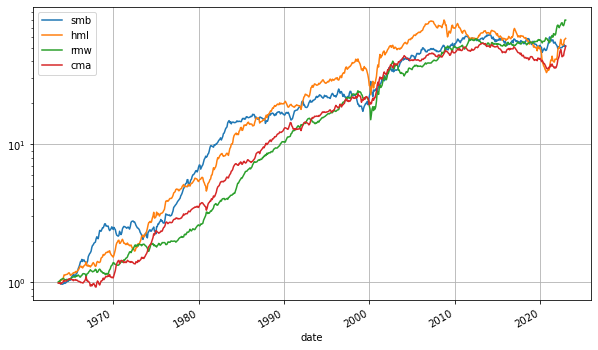

In [58]:
(1+fret.add(rf_data['rf'], axis = 'index')).cumprod().plot(grid=True, logy = True)

### Average Returns

In [59]:
fret.mean()*100*12

smb    2.821362
hml    3.093978
rmw    3.346857
cma    2.593968
dtype: float64

### Compare Sharpe-ratio

In [60]:
(fret.mean()/fret.std())*np.sqrt(12)

smb    0.274682
hml    0.289917
rmw    0.423209
cma    0.341010
dtype: float64